<a href="https://colab.research.google.com/github/frm1789/DeepLearning/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *  # Importar las herramientas de visión de fastai

# Descargar y descomprimir los datos
path = untar_data(URLs.MNIST_SAMPLE)

# Ver la ruta del conjunto de datos
print(path)

# Revisar qué hay en la carpeta descargada
print(path.ls())

/root/.fastai/data/mnist_sample
[Path('/root/.fastai/data/mnist_sample/labels.csv'), Path('/root/.fastai/data/mnist_sample/valid'), Path('/root/.fastai/data/mnist_sample/train')]


In [3]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png'),Path('/root/.fastai/data/mnist_sample/train/3/10093.png'),Path('/root/.fastai/data/mnist_sample/train/3/10097.png'),Path('/root/.fastai/data/mnist_sample/train/3/10099.png'),Path('/root/.fastai/data/mnist_sample/train/3/10116.png'),Path('/root/.fastai/data/mnist_sample/train/3/10125.png'),Path('/root/.fastai/data/mnist_sample/train/3/10137.png'),Path('/root/.fastai/data/mnist_sample/train/3/10141.png'),Path('/ro

In [4]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [5]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [6]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [7]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [9]:
submatriz_maxima = im3_t[0:28, 0:28]
df = pd.DataFrame(submatriz_maxima)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [10]:
seven_tensors = [tensor(Image.open(o)) for o in sevens] # Pillow (la librería de Python para manejo de imágenes).
three_tensors = [tensor(Image.open(o)) for o in threes] # Un tensor es una estructura similar a un array de NumPy, pero optimizada para operaciones con GPU (aunque también puede usarse en CPU).
len(three_tensors),len(seven_tensors)

(6131, 6265)

In [11]:
len(three_tensors), len(seven_tensors)

(6131, 6265)

## **¿Por qué tienes tensores si usas fastai?**

Fastai usa PyTorch como backend para la mayoría de sus funcionalidades, incluyendo los tensores. La librería fastai simplemente facilita el uso de PyTorch al proporcionar APIs más sencillas para tareas comunes como la carga de datos, el entrenamiento de modelos y la visualización de resultados.

En este caso:

    Tensores de PyTorch:
    Fastai convierte automáticamente los datos de entrada en tensores de PyTorch para poder procesarlos en un modelo.
    No son tensores de Scikit-learn:
        
Scikit-learn no utiliza tensores, ya que está basado en NumPy y maneja arrays de NumPy para sus cálculos.
En contraste, fastai y PyTorch trabajan con tensores, que son más flexibles y eficientes para modelos de aprendizaje profundo, especialmente en GPU.

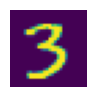

In [12]:
show_image(three_tensors[1]);

In [13]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape
torch.Size([6131, 28, 28])

torch.Size([6131, 28, 28])

In [14]:
len(stacked_threes.shape)

3

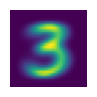

In [15]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

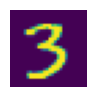

In [20]:
a_3 = stacked_threes[1]
show_image(a_3);

In [21]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr


(tensor(0.1114), tensor(0.2021))

In [22]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [26]:
valid_3_tens = torch.stack([tensor(Image.open(o))
  for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
  for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [27]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)
tensor(0.1114)

tensor(0.1114)

In [28]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1242, 0.1069, 0.1495,  ..., 0.1138, 0.1367, 0.1463]),
 torch.Size([1010]))